# Applying KMeans after PCA

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ML import KMeansPlusPlus, PCATransformer

### Generating points

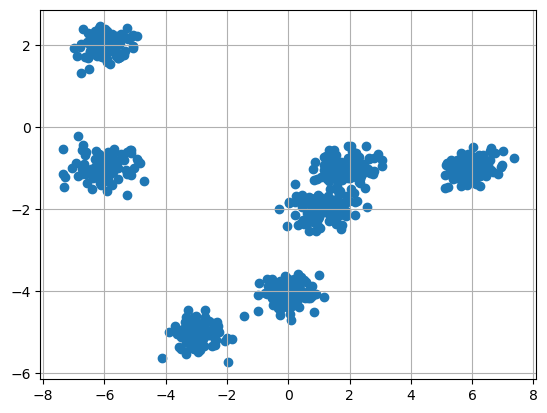

In [2]:
clusters = 7
n_samples = 100
n_features = 2

# Generate random positive semi-definite matrix
A = np.array([
    [2, 1/5], [0, 1]
]) / 4
cov = A @ A.T

# Generate random means for each cluster
means = np.random.randint(low=-7, high=7, size=(clusters, n_features))

# Generate samples for all clusters at once
X = np.random.multivariate_normal(np.zeros(2), cov, (clusters, n_samples))

# Add the means to each cluster's samples
X += means[:, np.newaxis, :]

# Reshape X to combine all clusters
X = X.reshape(-1, 2)

# Plot the results
plt.scatter(X[:, 0], X[:, 1])
plt.grid()
plt.show()

### Transforming the data using PCA

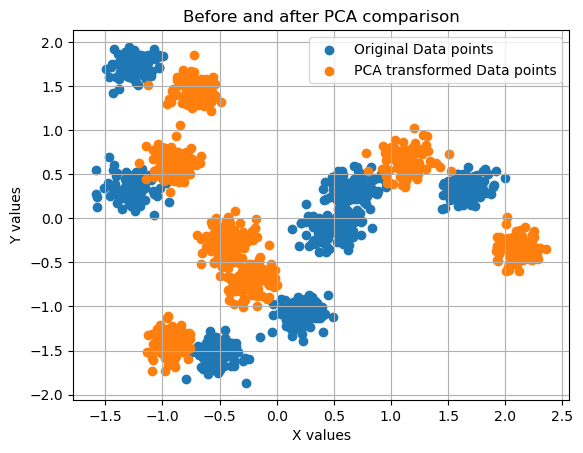

In [3]:
customPCA = PCATransformer(n_components=2)
X_org = X.copy()
X = (X - X.mean(axis=0)) / X.std(axis=0)
customPCA.fit(X)
X_transformed = customPCA.transform(X)

scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    label='Original Data points'
)


scatter2 = plt.scatter(
    X_transformed[:, 0],
    X_transformed[:, 1],
    label='PCA transformed Data points'
)

plt.title('Before and after PCA comparison')
plt.xlabel('X values')
plt.ylabel('Y values')


plt.legend(handles=[scatter, scatter2])
plt.grid()
plt.show()

### Clustering the original data points

Sum of Squared Errors: 0.2910515055247588


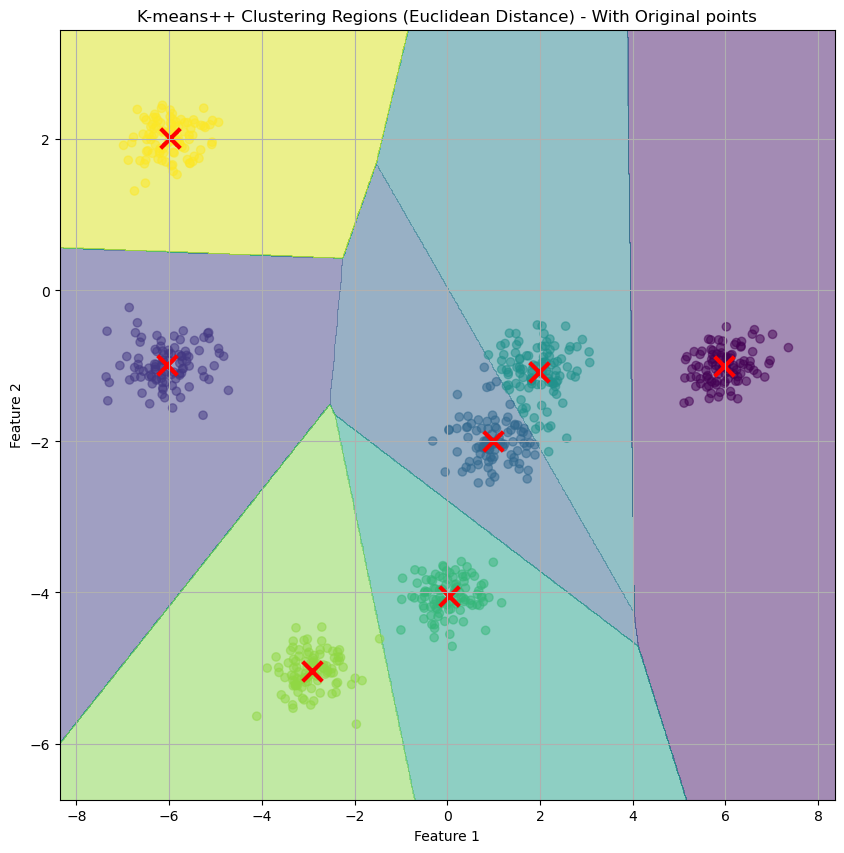

In [4]:
# Initiate and fit
k = 7
kmeansplus = KMeansPlusPlus(k=k, max_iter=50, distance_type='euclidean')
kmeansplus.fit(X_org)

sse = kmeansplus.calculate_sse(X_org)
print(f"Sum of Squared Errors: {sse}")

# Create a meshgrid
x_min, x_max = X_org[:, 0].min() - 1, X_org[:, 0].max() + 1
y_min, y_max = X_org[:, 1].min() - 1, X_org[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

# Flatten the grid to pass into predict
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict assignments for each point in the meshgrid
region_assignments = kmeansplus.predict(grid_points)

# Reshape the assignment array to match the meshgrid shape
region_assignments = region_assignments.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 10))

# Plot the regions
plt.contourf(xx, yy, region_assignments, alpha=0.5)

# Plot the centroids
plt.scatter(kmeansplus.centroids[:, 0], kmeansplus.centroids[:, 1], marker='x', color='red', s=100, linewidths=3)
# Plot data points
plt.scatter(X_org[:, 0], X_org[:, 1], c=kmeansplus.assignments, alpha=0.5)

# Plot centroids
plt.scatter(kmeansplus.centroids[:, 0], kmeansplus.centroids[:, 1], marker='x', color='red', s=200, linewidths=3)

plt.grid(True)
plt.title('K-means++ Clustering Regions (Euclidean Distance) - With Original points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Clustering the PCA transformed data points (Euclidean distance)

Sum of Squared Errors: 0.026782369354456676


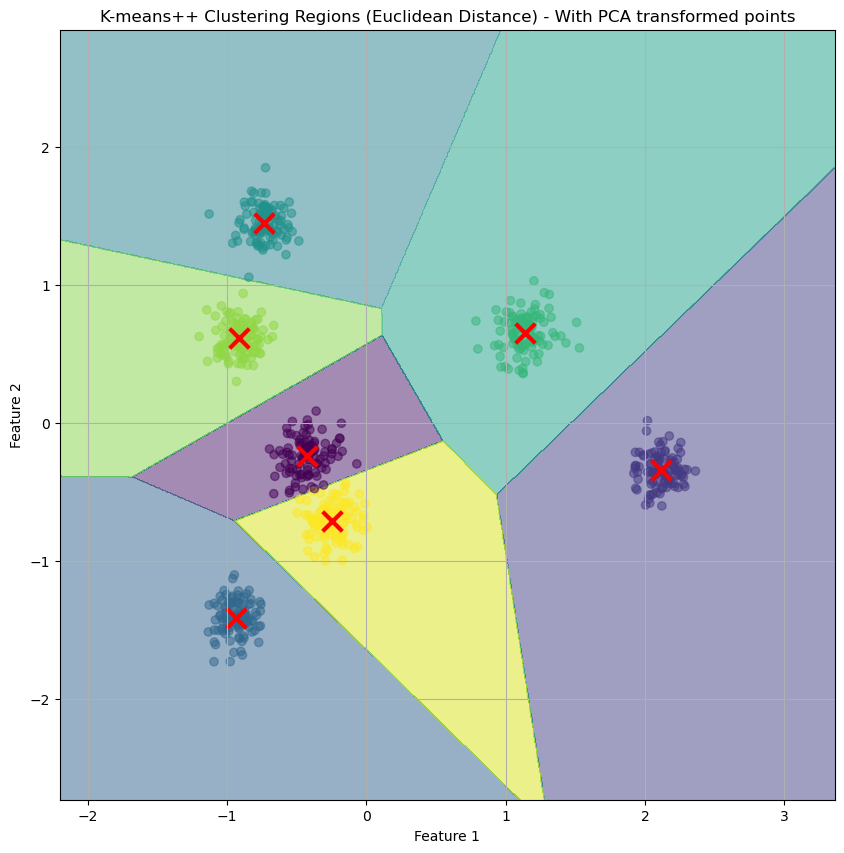

In [5]:
# Initiate and fit
kmeansplus = KMeansPlusPlus(k=k, max_iter=50, distance_type='euclidean')
kmeansplus.fit(X_transformed)

sse = kmeansplus.calculate_sse(X_transformed)
print(f"Sum of Squared Errors: {sse}")

# Create a meshgrid
x_min, x_max = X_transformed[:, 0].min() - 1, X_transformed[:, 0].max() + 1
y_min, y_max = X_transformed[:, 1].min() - 1, X_transformed[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

# Flatten the grid to pass into predict
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict assignments for each point in the meshgrid
region_assignments = kmeansplus.predict(grid_points)

# Reshape the assignment array to match the meshgrid shape
region_assignments = region_assignments.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 10))

# Plot the regions
plt.contourf(xx, yy, region_assignments, alpha=0.5)

# Plot the centroids
plt.scatter(kmeansplus.centroids[:, 0], kmeansplus.centroids[:, 1], marker='x', color='red', s=100, linewidths=3)
# Plot data points
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=kmeansplus.assignments, alpha=0.5)

# Plot centroids
plt.scatter(kmeansplus.centroids[:, 0], kmeansplus.centroids[:, 1], marker='x', color='red', s=200, linewidths=3)

plt.grid(True)
plt.title('K-means++ Clustering Regions (Euclidean Distance) - With PCA transformed points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Manhattan distance

Sum of Squared Errors: 0.04284481798856815


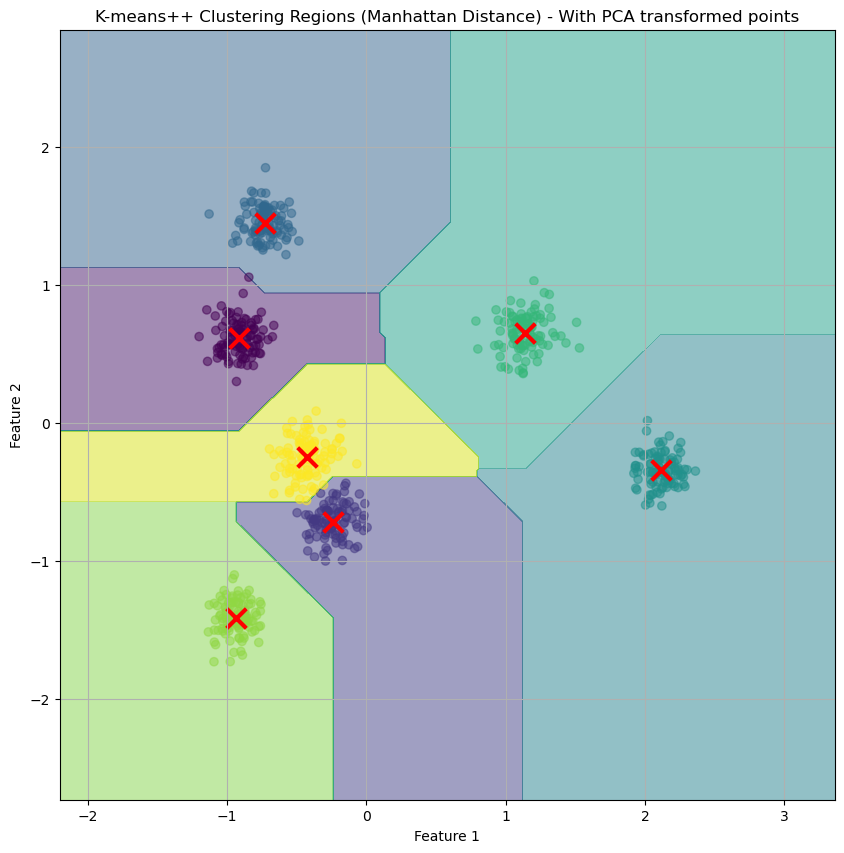

In [6]:
# Initiate and fit
kmeansplus = KMeansPlusPlus(k=k, max_iter=50, distance_type='manhattan')
kmeansplus.fit(X_transformed)

sse = kmeansplus.calculate_sse(X_transformed)
print(f"Sum of Squared Errors: {sse}")

# Predict assignments for each point in the meshgrid
region_assignments = kmeansplus.predict(grid_points)

# Reshape the assignment array to match the meshgrid shape
region_assignments = region_assignments.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 10))

# Plot the regions
plt.contourf(xx, yy, region_assignments, alpha=0.5)

# Plot the centroids
plt.scatter(kmeansplus.centroids[:, 0], kmeansplus.centroids[:, 1], marker='x', color='red', s=100, linewidths=3)
# Plot data points
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=kmeansplus.assignments, alpha=0.5)

# Plot centroids
plt.scatter(kmeansplus.centroids[:, 0], kmeansplus.centroids[:, 1], marker='x', color='red', s=200, linewidths=3)

plt.grid(True)
plt.title('K-means++ Clustering Regions (Manhattan Distance) - With PCA transformed points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Cosine distance for KMeans

Sum of Squared Errors: 0.00014956322734074979


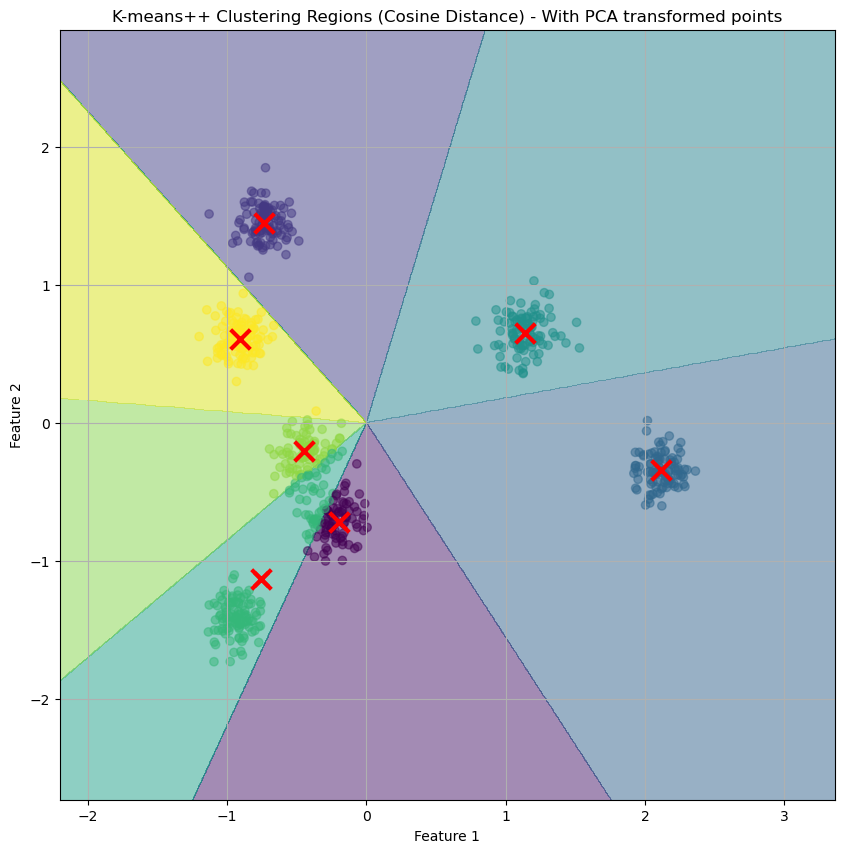

In [7]:
# Initiate and fit
kmeansplus = KMeansPlusPlus(k=k, max_iter=50, distance_type='cosine')
kmeansplus.fit(X_transformed)

sse = kmeansplus.calculate_sse(X_transformed)
print(f"Sum of Squared Errors: {sse}")

# Create a meshgrid
x_min, x_max = X_transformed[:, 0].min() - 1, X_transformed[:, 0].max() + 1
y_min, y_max = X_transformed[:, 1].min() - 1, X_transformed[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

# Flatten the grid to pass into predict
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict assignments for each point in the meshgrid
region_assignments = kmeansplus.predict(grid_points)

# Reshape the assignment array to match the meshgrid shape
region_assignments = region_assignments.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 10))

# Plot the regions
plt.contourf(xx, yy, region_assignments, alpha=0.5)

# Plot the centroids
plt.scatter(kmeansplus.centroids[:, 0], kmeansplus.centroids[:, 1], marker='x', color='red', s=100, linewidths=3)
# Plot data points
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=kmeansplus.assignments, alpha=0.5)

# Plot centroids
plt.scatter(kmeansplus.centroids[:, 0], kmeansplus.centroids[:, 1], marker='x', color='red', s=200, linewidths=3)

plt.grid(True)
plt.title('K-means++ Clustering Regions (Cosine Distance) - With PCA transformed points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

It’s fair to say that cosine similarity might offer distinct advantages after PCA, as it considers orientation rather than magnitude, which aligns with PCA’s goal of capturing directionality in the data.

However, the best measure can still vary depending on the specific dataset and clustering objectives.

## Elbow Method

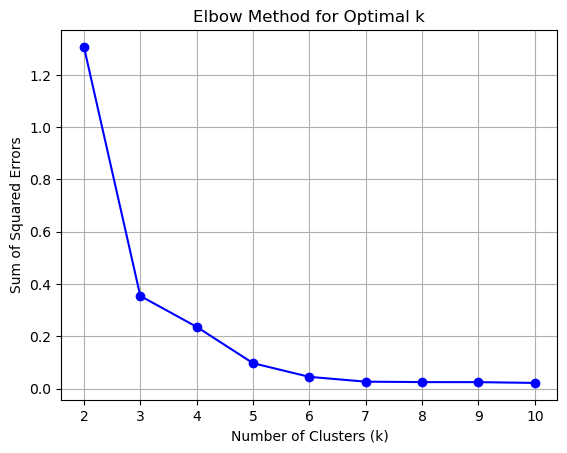

In [8]:
sse_values = []
k_values = range(2, 11)  # for example

for k in k_values:
    kmeansplus = KMeansPlusPlus(k=k)
    kmeansplus.fit(X)
    sse = kmeansplus.calculate_sse(X)
    sse_values.append(sse)

plt.plot(k_values, sse_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()